In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
df=pd.read_csv("file.csv")


## **UNDERSTADING THE CATEGORICAL VARIABLES PRESENT IN THE DATASET** 

In [3]:
categorical_cols = ['Attrition','BusinessTravel','Department','Gender',
                   'JobRole', 'Over18', 'OverTime']

for i in categorical_cols:
    print('*****', i, '*****')
    print(df[i].value_counts())
    print('')

***** Attrition *****
No     1233
Yes     237
Name: Attrition, dtype: int64

***** BusinessTravel *****
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

***** Department *****
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

***** Gender *****
Male      882
Female    588
Name: Gender, dtype: int64

***** JobRole *****
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

***** Over18 *****
Y    1470
Name: Over18, dtype: int64

***** OverTime *****
No     1054
Yes     416
Name: OverTime, dtype: int64



# **CONVERTING THE CATEGORICAL VARIABLES TO DUMMY DATA SO THAT THE CODE CAN PROCESS IT, SINCE IT NEEDS TO BE AN NUMERICAL FORMAT**

In [0]:
df.Gender=pd.get_dummies(df.Gender)
df.Over18=pd.get_dummies(df.Over18)
df.OverTime=pd.get_dummies(df.OverTime)
df.Attrition=pd.get_dummies(df.Attrition)

In [0]:
df=pd.get_dummies(df)

In [6]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,0,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,0,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,1,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,0,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,0,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,0,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,1,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,1,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,23,2,1,2061,3,0,41,4,2,4,2571,12290,4,1,1,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,1,613,6,1,1,2062,4,0,42,2,3,1,9991,21457,4,1,1,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,1,155,4,3,1,2064,2,0,87,4,2,2,6142,5174,1,1,0,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,1,1023,2,3,1,2065,4,0,63,2,2,2,5390,13243,2,1,1,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# **FOLLWING THE VALIDATION METHOD OF TRAIN/TEST SPLIT**

In [0]:
from sklearn.model_selection import train_test_split
y=df.Attrition
X=df.drop('Attrition',axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# **TRAINING THE STACKING ENSEMBLE METHOD TO GET THE BEST METHOD**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')
clf_dt = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=15, random_state=500)
clf_nb = GaussianNB()

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2')

In [0]:
lr = LogisticRegression(C=10)

In [24]:
clf_stack=StackingClassifier(classifiers=[clf_knn,clf_dt,clf_nb],meta_classifier=lr,use_features_in_secondary=False)
clf_stack.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='ball_tree',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decre

# **VISUALIZING THE ACCURACY RESULT OF STACKING ENSEMBLE METHOD**

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, clf_stack.predict(X_test))))  

Accuracy: 0.8197


In [0]:
from sklearn.metrics import confusion_matrix
o=confusion_matrix(y_test, clf_stack.predict(X_test))

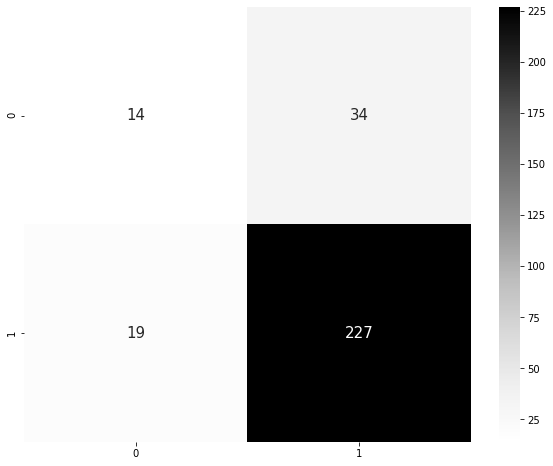

(294, 53)

In [27]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(o, cmap="Greys", annot=True, annot_kws={"size":15}, fmt="g")
ax.set_ylim(2, 0)
plt.show()
X_test.shape

# **USING GRADIENT BOOSTING ALGORITHM FOR COMPARISION**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=500)
clf_gbm.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=500, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
pred = clf_gbm.predict(X_test)

# **VISUALIZING THE ACCURACY RESULT USING THE GRADIENT BOOSTING ALGORITHM**

In [45]:
acc = accuracy_score(y_test, pred)
print('Accuracy: {:.3f}'.format(acc))


Accuracy: 0.871


In [0]:
l=confusion_matrix(y_test,pred )

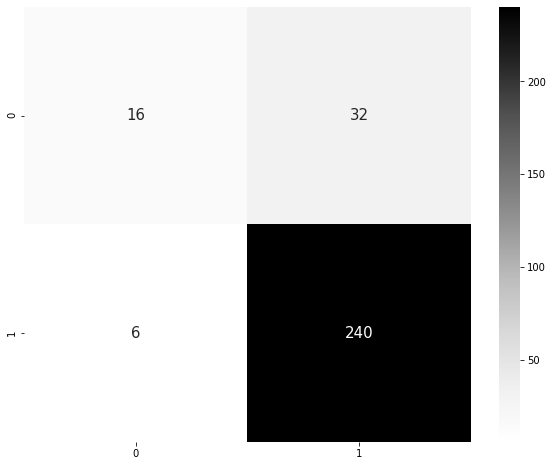

In [47]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(l, cmap="Greys", annot=True, annot_kws={"size":15}, fmt="g")
ax.set_ylim(2, 0)
plt.show()

# **FROM THE ACCURACY RESULTS WE CAN CONCLUDE THAT THE GRADIENT BOOSTING METHOD (GBM) IS A BETTER MODEL COMPARED TO STACKING ENSEMBLE MODEL. I TRIED THE RANDOM FOREST ALGORITHM (RFA) AS WELL IT GAVE ME AN ACCURACY OF 87.4% BUT I STILL THINK THAT GBM MODEL IS BETTER BECAUSE GBM LEARNS FROM ITS PREVIOUS MODELS WHILE RFA JUST AVERAGES THE RESULTS OBTAINED FROM ITS TREES. GBM MODEL IN THE FUTURE CAN LEARN FROM OTHER DATASETS AND GIVE A MORE CONVINCING PERFORMANCE COMPARED TO RFA**